In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#pandas
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",2000)

In [2]:
df=pd.read_csv('Company Stock and Investment.csv',index_col=[0],parse_dates=[0])

In [3]:
df.head()

,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


# Working on Company Stock over time Series

In [5]:
df.drop(columns=['Oil Investments','Gold Investments','Other sharesInvestments'],inplace=True)

In [6]:
df.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


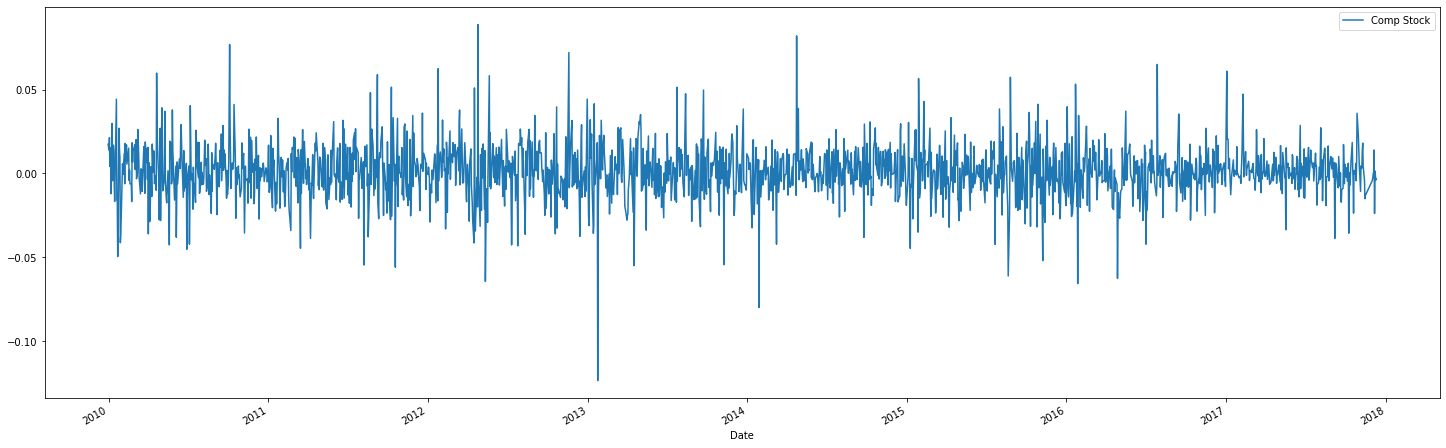

In [8]:
df.plot(figsize=(25,8))

In [9]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [10]:
test_result=adfuller(df['Comp Stock']) # adfuller give us 5 values

In [11]:
  # just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.473386265908292, 3.2077742930891226e-23, 12, 1971, {'1%': -3.4336720887549483, '5%': -2.863007508094813, '10%': -2.567551240570721}, -10649.854659769328)


In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [13]:
adfuller_test(df['Comp Stock'])

ADF Test Statistic : -12.473386265908292
p-value : 3.2077742930891226e-23
#Lags Used : 12
Number of Observations Used : 1971
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


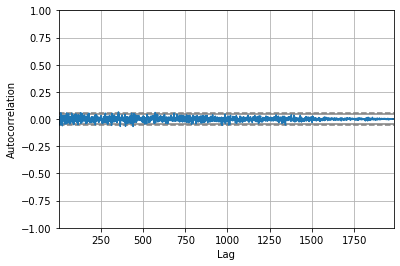

In [14]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Comp Stock'])
plt.show()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

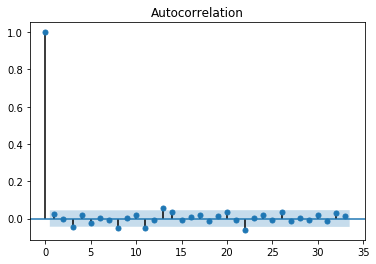

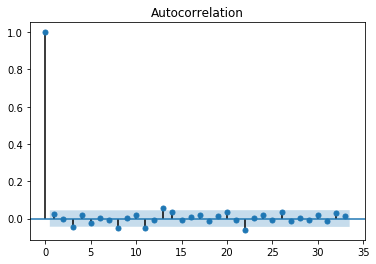

In [16]:
plot_acf(df['Comp Stock'])

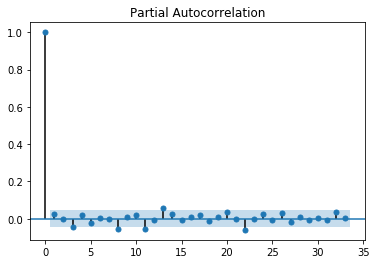

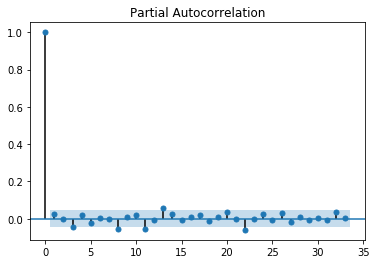

In [17]:
plot_pacf(df['Comp Stock'])

In [18]:
train = df[:1510]
test = df[1511:]

In [19]:
train.size,test.size

(1510, 473)

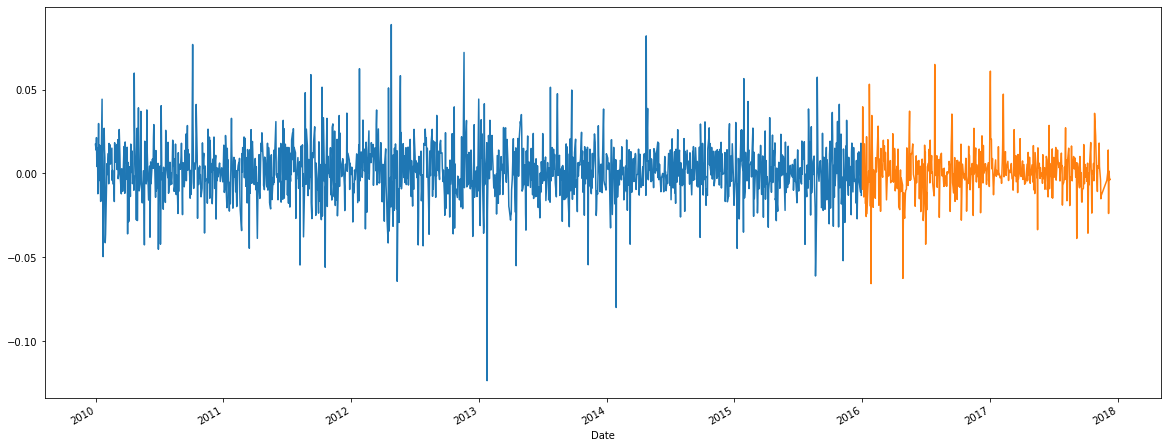

In [20]:
train['Comp Stock'].plot(figsize=(20,8))
test['Comp Stock'].plot()


In [21]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model=ARIMA(train,order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\himan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\himan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\himan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\himan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Comp Stock   No. Observations:                 1509
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3723.288
Method:                       css-mle   S.D. of innovations              0.021
Date:                Sun, 18 Oct 2020   AIC                          -7440.576
Time:                        21:45:03   BIC                          -7424.618
Sample:                             1   HQIC                         -7434.633
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -1.3e-05      0.000     -0.037      0.971      -0.001       0.001
ar.L1.D.Comp Stock    -0.4915      0.022    -21.922      0.000      -0.535      -0.448
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0347           +0.0000j            2.0347            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\himan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


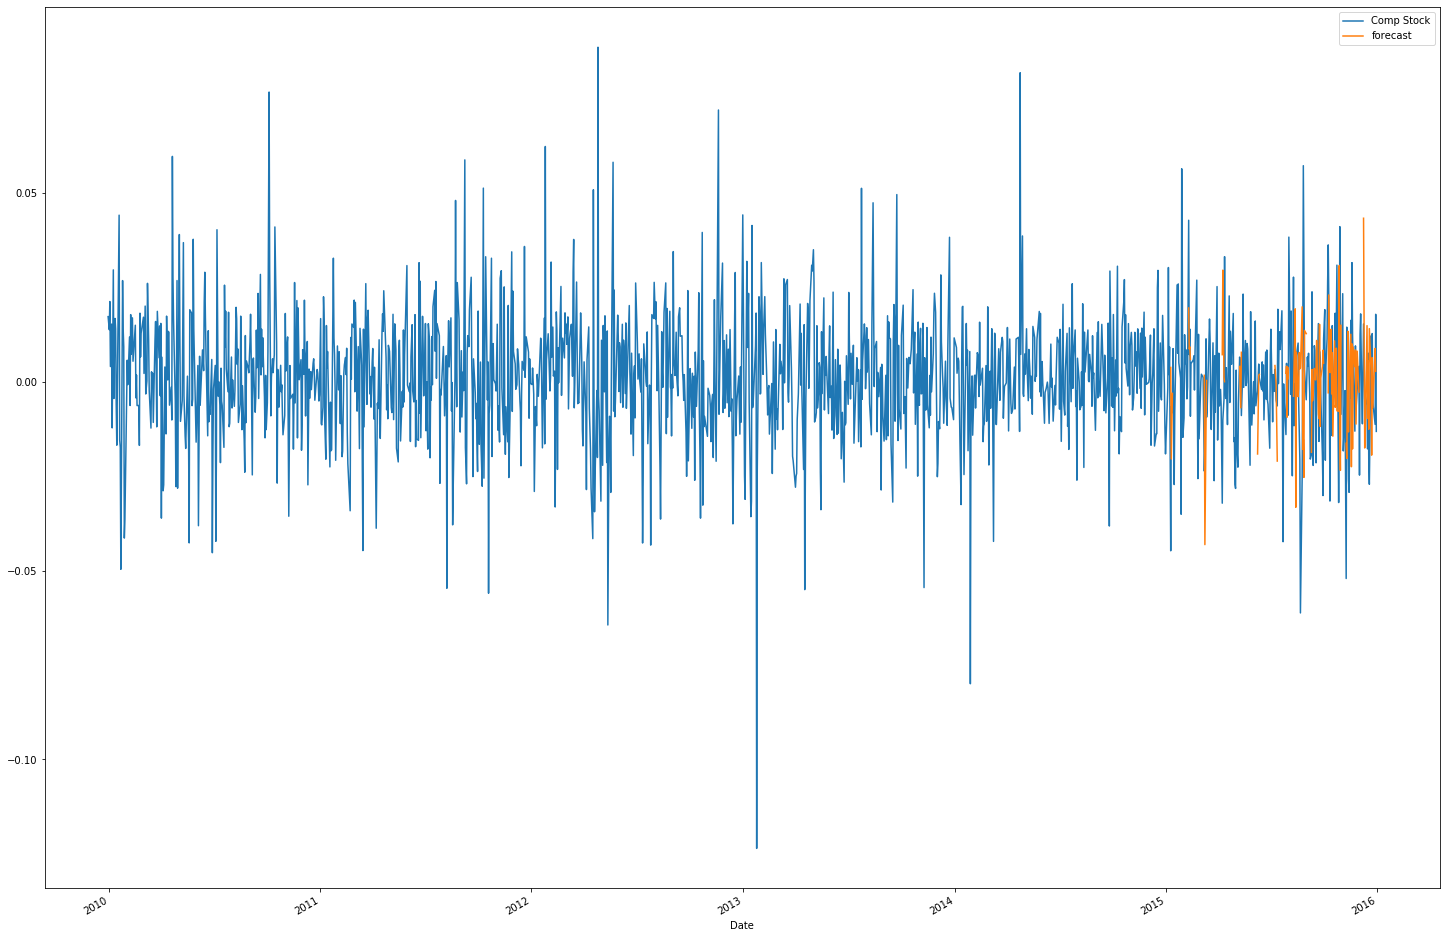

In [24]:
train['forecast']=model_fit.predict(start=1400,end=1508)
train[['Comp Stock','forecast']].plot(figsize=(25,18))


In [25]:
CompStock_forecast = model_fit.forecast(steps=473)[0]

In [26]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,CompStock_forecast))

0.015115917741030415

In [27]:
#creating some data to predict future of this.
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]
#future_dates

In [28]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=train.columns)

In [ ]:
future_datest_df.head(50)

In [ ]:
len(future_datest_df)

In [29]:
future_df=pd.concat([df,future_datest_df])

In [30]:
future_df.tail(50)

,Comp Stock,forecast
2017-11-13,-0.004008,NaN
2017-11-14,-0.015118,NaN
2017-11-15,-0.013190,NaN
2017-12-15,NaN,NaN
2018-01-15,NaN,NaN
2018-02-15,NaN,NaN
2018-03-15,NaN,NaN
2018-04-15,NaN,NaN
2018-05-15,NaN,NaN
2018-06-15,NaN,NaN


In [31]:
future_forcast=model_fit.forecast(steps=1985)[0]

In [32]:
future_forcast_df=pd.DataFrame(future_forcast)

In [33]:
column_name=['ForcastDate']
result=pd.DataFrame(future_dates,columns=column_name)

In [34]:
result['Comp Stock forcast']=pd.DataFrame(future_forcast)

In [35]:
result.head(50)

,ForcastDate,Comp Stock forcast
0,2017-11-15,0.002174
1,2017-12-15,-0.005332
2,2018-01-15,-0.001663
3,2018-02-15,-0.003485
4,2018-03-15,-0.002609
5,2018-04-15,-0.003059
6,2018-05-15,-0.002857
7,2018-06-15,-0.002976
8,2018-07-15,-0.002937
9,2018-08-15,-0.002975
